## No noise

First, we will just experiment with no noise to make sure we construct an accurate simulation of the original results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = 5 #Number of columns 
r = 2 #Dimension of U*

S = np.random.rand(d,r) #Random (true) subspace
#S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

print("True space \n", S)

True space 
 [[0.53681681 0.31955386]
 [0.90434765 0.92795992]
 [0.80238186 0.30370519]
 [0.04821501 0.96115855]
 [0.61738405 0.31999264]]


In [2]:
#Define the binary matrix W

W = np.array([[1,0,0],[1,1,0],[1,1,1],[0,1,1],[0,0,1]])
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 0 1]]


In [3]:
#Computing the projections of S onto canonical coordinates


S_0 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[0,j] == 1])    
S_1 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[1,j] == 1])   
S_2 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[2,j] == 1])

S_proj = np.hstack((S_0,S_1,S_2))

print("Matrix of projections of S onto lower dimensions \n", S_proj)

Matrix of projections of S onto lower dimensions 
 [[0.53681681 0.31955386 0.90434765 0.92795992 0.80238186 0.30370519]
 [0.90434765 0.92795992 0.80238186 0.30370519 0.04821501 0.96115855]
 [0.80238186 0.30370519 0.04821501 0.96115855 0.61738405 0.31999264]]


In [4]:
#Computing the nullspaces of the projections

from scipy.linalg import null_space

A_0 = null_space(S_0.T)
A_1 = null_space(S_1.T)
A_2 = null_space(S_2.T)

A_temp = np.hstack((A_0,A_1,A_2)) 

print("Matrix of basis vectors of the nullspace of projections \n", A_temp)

Matrix of basis vectors of the nullspace of projections 
 [[-0.89890367 -0.62337566 -0.60546576]
 [ 0.17860536  0.67932726 -0.07254746]
 [ 0.40009038  0.38719149  0.79255793]]


In [5]:
#Creating the matrix A whose null space will be the true subspace

A = np.array(W, dtype = float)

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
print("Matrix whose kernel will be our guess \n", A)

Matrix whose kernel will be our guess 
 [[-0.89890367  0.          0.        ]
 [ 0.17860536 -0.62337566  0.        ]
 [ 0.40009038  0.67932726 -0.60546576]
 [ 0.          0.38719149 -0.07254746]
 [ 0.          0.          0.79255793]]


In [6]:
#Finding kernel space of A

S_test = null_space(A.T)

print("Basis of guessed space \n", S_test)

Basis of guessed space 
 [[ 0.02157223  0.3712487 ]
 [ 0.4118576   0.54500085]
 [-0.13539094  0.59080837]
 [ 0.90063125 -0.15912531]
 [-0.02099035  0.43677578]]


In [7]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(S_test,np.dot(np.linalg.inv(np.dot(S_test.T,S_test)), S_test.T))

P_true = np.dot(S,np.dot(np.linalg.inv(np.dot(S.T,S)), S.T))

error = np.linalg.norm(P_true - P_test, 'fro') 

print ("True projection", P_true)
print ("Guessed projection", P_test)

print ("Error", error)

True projection [[ 0.13829096  0.21121555  0.21641615 -0.03964644  0.16169963]
 [ 0.21121555  0.46665261  0.26622928  0.2842084   0.22939813]
 [ 0.21641615  0.26622928  0.36738524 -0.21594988  0.26089269]
 [-0.03964644  0.2842084  -0.21594988  0.83645752 -0.08840665]
 [ 0.16169963  0.22939813  0.26089269 -0.08840665  0.19121367]]
Guessed projection [[ 0.13829096  0.21121555  0.21641615 -0.03964644  0.16169963]
 [ 0.21121555  0.46665261  0.26622928  0.2842084   0.22939813]
 [ 0.21641615  0.26622928  0.36738524 -0.21594988  0.26089269]
 [-0.03964644  0.2842084  -0.21594988  0.83645752 -0.08840665]
 [ 0.16169963  0.22939813  0.26089269 -0.08840665  0.19121367]]
Error 4.936378087359142e-16


## With noise 

Now we will perform the same experiment, but we will add noise into the mix and see how the noise translates through every step.

In [8]:
d = 5 #Number of columns 
r = 2 #Dimension of U*


S = np.random.rand(d,r) #Random (true) subspace
#S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

print("True space \n", S)

True space 
 [[0.047944   0.41131052]
 [0.5384001  0.43157746]
 [0.31181228 0.84221249]
 [0.65662577 0.84386963]
 [0.624796   0.03480811]]


In [9]:
#Define the binary matrix W

W = np.array([[1,0,0],[1,1,0],[1,1,1],[0,1,1],[0,0,1]])
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 0 1]]


In [10]:
# Computing the projections of S onto canonical coordinates

# No noise Version

S_0 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[0,j] == 1])  
S_1 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[1,j] == 1])
S_2 = np.array([S[j,:] for j in range(np.shape(S)[0]) if W_T[2,j] == 1])

S_proj = np.hstack((S_0,S_1,S_2))

# Creating the noisy versions

mu = 0 # mean
sigma = 1 # standard deviation
lam = 1e-2 # noise level

#Adding noise from a Gaussian distribution

S_0_noise = S_0 + np.random.normal(mu, sigma, (d-r,r))*lam
S_1_noise = S_1 + np.random.normal(mu, sigma, (d-r,r))*lam
S_2_noise = S_2 + np.random.normal(mu, sigma, (d-r,r))*lam

S_proj_noise = np.hstack((S_0_noise,S_1_noise,S_2_noise))


print("Projections of S onto lower dimensions w/o noise \n", S_proj)
print("Projections of S onto lower dimensions w/ noise \n", S_proj_noise)

Projections of S onto lower dimensions w/o noise 
 [[0.047944   0.41131052 0.5384001  0.43157746 0.31181228 0.84221249]
 [0.5384001  0.43157746 0.31181228 0.84221249 0.65662577 0.84386963]
 [0.31181228 0.84221249 0.65662577 0.84386963 0.624796   0.03480811]]
Projections of S onto lower dimensions w/ noise 
 [[0.02969583 0.41619289 0.54829323 0.43833332 0.31734744 0.85669672]
 [0.53665    0.42123575 0.31880219 0.85308814 0.66801338 0.84022503]
 [0.32123914 0.84358295 0.66185053 0.85081651 0.62150013 0.03855376]]


In [11]:
# Computing the nullspaces of the projections

# No noise version

A_0 = null_space(S_0.T)
A_1 = null_space(S_1.T)
A_2 = null_space(S_2.T)

A_temp = np.hstack((A_0,A_1,A_2)) 

# Noisy version

A_0_noise = null_space(S_0_noise.T)
A_1_noise = null_space(S_1_noise.T)
A_2_noise = null_space(S_2_noise.T)

A_temp_noise = np.hstack((A_0_noise,A_1_noise,A_2_noise)) 



print("Basis vectors of the nullspace of projections w/o noise \n", A_temp)
print("Basis vectors of the nullspace of projections w/ noise \n", A_temp_noise)

Basis vectors of the nullspace of projections w/o noise 
 [[-0.82413886 -0.62527411  0.64898462]
 [-0.22710779 -0.36873873 -0.66309546]
 [ 0.51886144  0.6877965   0.37299245]]
Basis vectors of the nullspace of projections w/ noise 
 [[-0.80103563 -0.6188111   0.63538069]
 [-0.27420328 -0.37204808 -0.66578587]
 [ 0.53212261  0.69184756  0.39117841]]


In [12]:
A_temp-A_temp_noise

array([[-0.02310322, -0.00646301,  0.01360393],
       [ 0.04709549,  0.00330934,  0.00269041],
       [-0.01326117, -0.00405106, -0.01818596]])

In [13]:
#Creating the matrix A whose null space will be the true subspace

# No noise version

A = np.array(W, dtype = float) 

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
            
# Noisy version
            
A_noise = np.array(W, dtype = float) 

for j in range(A_noise.shape[1]):
    c = 0
    for i in range(A_noise.shape[0]):
        if A_noise[i,j] == 1:
            A_noise[i,j] = A_temp_noise[c, j]
            c+=1       

            
print("Matrix whose kernel will be our guess w/o noise \n", A)
print("Matrix whose kernel will be our guess w/ noise \n", A_noise)

Matrix whose kernel will be our guess w/o noise 
 [[-0.82413886  0.          0.        ]
 [-0.22710779 -0.62527411  0.        ]
 [ 0.51886144 -0.36873873  0.64898462]
 [ 0.          0.6877965  -0.66309546]
 [ 0.          0.          0.37299245]]
Matrix whose kernel will be our guess w/ noise 
 [[-0.80103563  0.          0.        ]
 [-0.27420328 -0.6188111   0.        ]
 [ 0.53212261 -0.37204808  0.63538069]
 [ 0.          0.69184756 -0.66578587]
 [ 0.          0.          0.39117841]]


In [14]:
A - A_noise

array([[-0.02310322,  0.        ,  0.        ],
       [ 0.04709549, -0.00646301,  0.        ],
       [-0.01326117,  0.00330934,  0.01360393],
       [ 0.        , -0.00405106,  0.00269041],
       [ 0.        ,  0.        , -0.01818596]])

In [15]:
np.linalg.norm(A-A_noise, 'fro')

0.059327653541703905

In [16]:
#Finding kernel space of A

S_test = null_space(A.T) # No noise
S_test_noise = null_space(A_noise.T) # With noise

print("Basis of guessed space w/o noise \n", S_test)
print("Basis of guessed space w/ noise \n", S_test_noise)

Basis of guessed space w/o noise 
 [[ 0.24404097 -0.33556876]
 [ 0.39385198  0.29636477]
 [ 0.56001559 -0.40328398]
 [ 0.65828321  0.05321747]
 [ 0.19588359  0.7962986 ]]
Basis of guessed space w/ noise 
 [[ 0.23422233 -0.38095217]
 [ 0.3983665   0.30951634]
 [ 0.55786737 -0.41397576]
 [ 0.6563109   0.05422186]
 [ 0.21091238  0.76469546]]


In [17]:
S_test - S_test_noise

array([[ 0.00981863,  0.0453834 ],
       [-0.00451452, -0.01315157],
       [ 0.00214823,  0.01069178],
       [ 0.00197231, -0.00100439],
       [-0.01502879,  0.03160314]])

In [18]:
np.linalg.norm(S_test - S_test_noise, 'fro')

0.060809985945069665

In [19]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(S_test,np.dot(np.linalg.inv(np.dot(S_test.T,S_test)), S_test.T))
P_test_noise = np.dot(S_test_noise,np.dot(np.linalg.inv(np.dot(S_test_noise.T,S_test_noise)), S_test_noise.T))
P_true = np.dot(S,np.dot(np.linalg.inv(np.dot(S.T,S)), S.T))

error = np.linalg.norm(P_true - P_test, 'fro') 
error_noise = np.linalg.norm(P_true - P_test_noise, 'fro') 

print ("True projection", P_true)
print ("Guessed projection w/o noise", P_test)
print ("Guessed projection w/ noise", P_test_noise)

print ("Error w/o noise", error)
print ("Error w/ noise", error_noise)

True projection [[ 0.17216239 -0.00333474  0.27199625  0.14278995 -0.21940932]
 [-0.00333474  0.24295146  0.10104409  0.27503793  0.31314399]
 [ 0.27199625  0.10104409  0.47625544  0.34718711 -0.21143661]
 [ 0.14278995  0.27503793  0.34718711  0.43616888  0.17132387]
 [-0.21940932  0.31314399 -0.21143661  0.17132387  0.67246184]]
Guessed projection w/o noise [[ 0.17216239 -0.00333474  0.27199625  0.14278995 -0.21940932]
 [-0.00333474  0.24295146  0.10104409  0.27503793  0.31314399]
 [ 0.27199625  0.10104409  0.47625544  0.34718711 -0.21143661]
 [ 0.14278995  0.27503793  0.34718711  0.43616888  0.17132387]
 [-0.21940932  0.31314399 -0.21143661  0.17132387  0.67246184]]
Guessed projection w/ noise [[ 0.19998465 -0.02460459  0.28836996  0.13306674 -0.241912  ]
 [-0.02460459  0.25449623  0.09410341  0.27823483  0.32070616]
 [ 0.28836996  0.09410341  0.48259193  0.3436879  -0.19890425]
 [ 0.13306674  0.27823483  0.3436879   0.43368401  0.1798873 ]
 [-0.241912    0.32070616 -0.19890425  0.17

## Experiments

In [20]:
def Errors(d_, r_, U_, W_, lam_):

    # Computing the projections of S onto canonical coordinates

    # No noise Version

    U_0 = np.array([U_[j,:] for j in range(np.shape(U_)[0]) if W_.T[0,j] == 1])  
    U_1 = np.array([U_[j,:] for j in range(np.shape(U_)[0]) if W_.T[1,j] == 1])
    U_2 = np.array([U_[j,:] for j in range(np.shape(U_)[0]) if W_.T[2,j] == 1])

    U_proj = np.hstack((U_0,U_1,U_2))

    # Creating the noisy versions

    mu = 0 # mean
    sigma = 1 # standard deviation

    #Adding noise from a Gaussian distribution

    U_0_noise = U_0 + np.random.normal(mu, sigma, (d_-r_,r_))*lam_
    U_1_noise = U_1 + np.random.normal(mu, sigma, (d_-r_,r_))*lam_
    U_2_noise = U_2 + np.random.normal(mu, sigma, (d_-r_,r_))*lam_

    U_proj_noise = np.hstack((U_0_noise,U_1_noise,U_2_noise))


    # Computing the nullspaces of the projections

    # No noise version

    a_0 = null_space(U_0.T)
    a_1 = null_space(U_1.T)
    a_2 = null_space(U_2.T)

    a_temp = np.hstack((a_0,a_1,a_2)) 

    # Noisy version

    a_0_noise = null_space(U_0_noise.T)
    a_1_noise = null_space(U_1_noise.T)
    a_2_noise = null_space(U_2_noise.T)

    a_temp_noise = np.hstack((a_0_noise,a_1_noise,a_2_noise)) 
    
    #Creating the matrix A whose null space will be the true subspace

    # No noise version

    A_ = np.array(W_, dtype = float) 

    for j in range(A_.shape[1]):
        c = 0
        for i in range(A_.shape[0]):
            if A_[i,j] == 1:
                A_[i,j] = a_temp[c, j]
                c+=1

    # Noisy version

    Anoise_ = np.array(W_, dtype = float) 

    for j in range(Anoise_.shape[1]):
        c = 0
        for i in range(Anoise_.shape[0]):
            if Anoise_[i,j] == 1:
                Anoise_[i,j] = a_temp_noise[c, j]
                c+=1       

    error_A = np.linalg.norm(A_-Anoise_, 'fro')
    
    #Finding kernel space of A

    U_test = null_space(A_.T) # No noise
    U_test_noise = null_space(Anoise_.T) # With noise

    
    error_U_test = np.linalg.norm(U_test - U_test_noise, 'fro')
    
    # Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
    # We test this by looking at the projection matrices 
    # Error estimated with the ||Proj_true - Proj_test||_F, the frobenius norm of the difference in Projection matrices

    Proj_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
    Proj_test_noise = np.dot(U_test_noise,np.dot(np.linalg.inv(np.dot(U_test_noise.T,U_test_noise)), U_test_noise.T))
    Proj_true = np.dot(U_,np.dot(np.linalg.inv(np.dot(U_.T,U_)), U_.T))

    error_test = np.linalg.norm(Proj_true - Proj_test, 'fro') 
    error_noise_test = np.linalg.norm(Proj_true - Proj_test_noise, 'fro') 

    return error_A, error_U_test, error_test, error_noise_test

In [81]:
d = 5 #Number of columns 
r = 2 #Dimension of U

S = np.random.rand(d,r) #Random (true) subspace
#S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

W = np.array([[1,0,1],[1,1,0],[1,1,0],[0,1,1],[0,0,1]])

low_b = 1e-7 #Lower bound of noise
upper_b = 1e1 #Upper bound of noise
n = 5000 # Number of experiments

In [82]:
lam_vec = np.random.uniform(low_b,upper_b,n)
lam_vec = np.sort(lam_vec)

In [83]:
lam_vec

array([1.81852427e-03, 5.99937236e-03, 9.69302981e-03, ...,
       9.99026159e+00, 9.99192517e+00, 9.99960386e+00])

In [84]:
err_A = np.empty(n, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(n, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_test = np.empty(n, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noise_test = np.empty(n, dtype = float) # Stores error in difference between true projection and noise guess

c = 0
for lam in lam_vec:
    err_A[c], err_U_test[c], err_test[c], err_noise_test[c] = Errors(d,r,S,W,lam)
    c+=1


In [85]:
err_A

array([0.01939671, 0.04931681, 0.01688392, ..., 2.53614538, 1.16656389,
       2.35461498])

In [86]:
err_U_test

array([0.01477597, 0.06681821, 0.02006226, ..., 1.77220638, 1.83550763,
       2.10135901])

In [87]:
err_test

array([2.8037339e-15, 2.8037339e-15, 2.8037339e-15, ..., 2.8037339e-15,
       2.8037339e-15, 2.8037339e-15])

In [88]:
err_noise_test

array([0.0190098 , 0.06400415, 0.02225463, ..., 1.7689137 , 1.08704384,
       1.76305793])

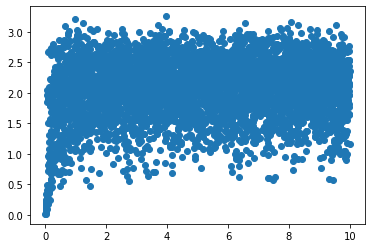

In [89]:
plt.scatter(lam_vec,err_A)
plt.show()

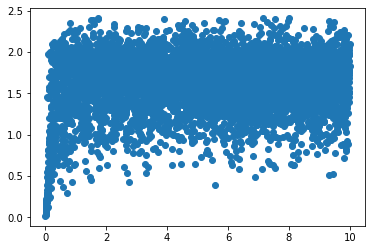

In [90]:
plt.scatter(lam_vec, err_U_test)
plt.show()

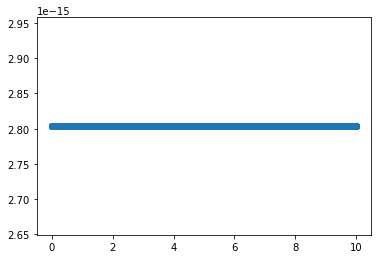

In [91]:
plt.scatter(lam_vec, err_test)
plt.show()

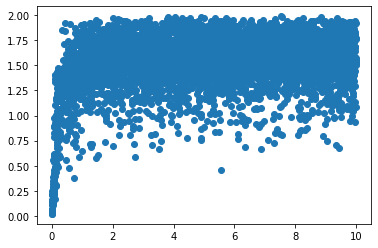

In [92]:
plt.scatter(lam_vec, err_noise_test)
plt.show()